In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import qt3utils.analysis.rabi

In [3]:
scan_data = np.load('rabi_scan_v2.npy', allow_pickle=True)

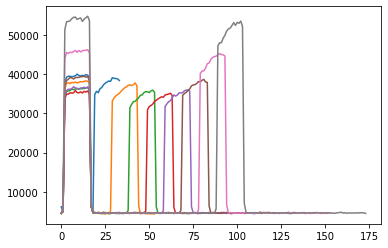

In [4]:
for scan in scan_data[::10]:
    plt.plot(scan[3])

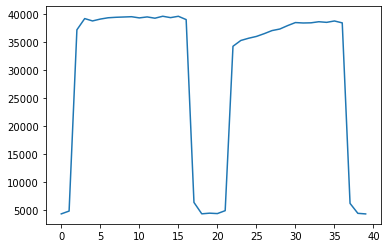

In [5]:
plt.plot(scan_data[3][3])

In [6]:
aom_width_time = 3e-6
pre_trigger = 2
clock_period = 200e-9

In [7]:
scan_i = 4


rf_width_time = scan_data[scan_i][0]
N_samples_per_cycle = scan_data[scan_i][1]

aom_width_ticks = np.round(aom_width_time / clock_period).astype(int)
rf_width_ticks = np.round(rf_width_time / clock_period).astype(int)

summed_trace = scan_data[scan_i][3]
print(summed_trace)

[ 4391.  4913. 36765. 38184. 38458. 38494. 38820. 38875. 39060. 39086.
 39002. 39089. 39301. 38876. 39044. 38825. 38316.  6323.  4328.  4263.
  4288.  4277.  4931. 33868. 35225. 34619. 35567. 36180. 36729. 36975.
 37410. 37572. 37765. 37892. 37984. 38101. 38277. 37911.  6089.  4460.
  4374.  4304.]


In [8]:
qt3utils.analysis.rabi.signal_to_background(summed_trace, pre_trigger, aom_width_ticks, rf_width_ticks, True)

background
[36765. 38184. 38458. 38494. 38820. 38875. 39060. 39086. 39002. 39089.
 39301. 38876. 39044. 38825. 38316.]
signal
[33868. 35225. 34619. 35567. 36180. 36729. 36975. 37410. 37572. 37765.
 37892. 37984. 38101. 38277. 37911.]


0.9515335361387119

In [18]:
contrast = []


for scan in scan_data:
    rf_width_time = scan[0]
    N_samples_per_cycle = scan[1]
    clock_period = scan[2]
    summed_trace = scan[3]
    
    aom_width_ticks = np.round(aom_width_time / clock_period).astype(int)
    rf_width_ticks = np.round(rf_width_time / clock_period).astype(int)

    c = qt3utils.analysis.rabi.signal_to_background(summed_trace, pre_trigger, 
                               aom_width_ticks, rf_width_ticks, aom_width_duty = 0.5)
    contrast.append([rf_width_time, c]) 

In [19]:
contrast = np.array(contrast)

In [20]:
from scipy import optimize

def rabi(x, a, b, phi, t, offset, slope):
    return a * np.exp(-x/t) * np.sin(x/b + phi) + offset + slope * x

x_data = contrast[:, 0]*1e6
y_data = contrast[:, 1]

params, params_covariance = optimize.curve_fit(rabi, x_data, y_data)


In [21]:
params

array([-5.70745226e-03,  4.71329194e+00,  2.53344683e+00,  1.37099767e+05,
        9.27094682e-01, -7.11967967e-04])

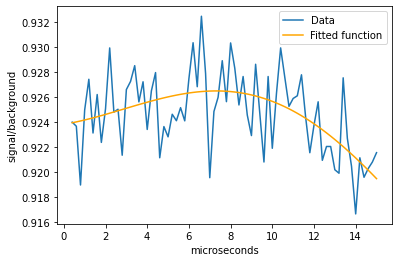

In [22]:
plt.figure(figsize=(6, 4))
plt.plot(x_data, y_data, label='Data')
plt.xlabel('microseconds')
plt.ylabel('signal/background')
plt.plot(x_data, rabi(x_data, *params),
         label='Fitted function', color='orange')
plt.legend()

In [23]:
#t_rabi in microseconds
params[3]

137099.7673728969

In [24]:
#oscillation period in microseconds
params[1]*2*np.pi

29.614486674668395